### Bike Sharing : Multiple Linear Regression

In [25]:
# Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [26]:
#Remove warnings in kernel while running a cell
import warnings
warnings.filterwarnings('ignore')

#notebook setting to display all the rowns and columns .
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns',None)

### Reading and Understanding the Data

In [27]:
# Importing day.csv and vewing the dataframe

df_day_bike = pd.read_csv('day.csv')
df_day_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [28]:
# Let's see how many rows and columns we have

df_day_bike.shape

(730, 16)

In [29]:
# Check the descriptive information

df_day_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [30]:
df_day_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Finding :

```
Dataset has 730 rows and 16 columns.

Except one column, all other are either float or integer type.

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.
```


# DATA QUALITY CHECK

* Check for NULL/MISSING values 

In [31]:
# percentage of missing values in each column
round(100*(df_day_bike.isnull().sum()/len(df_day_bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [32]:
# row-wise null count percentage
round((df_day_bike.isnull().sum(axis=1)/len(df_day_bike))*100,2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

# Finding

* There are no missing / Null values either in columns or rows

## Duplicate Check

In [33]:
bike_dup = df_day_bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [34]:
print(bike_dup.shape,"___duplicates____") 
print(df_day_bike.shape,"___original____")

(730, 16) ___duplicates____
(730, 16) ___original____


### Insights

```
The shape after running the drop duplicate command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset
```

### Data Cleaning
```
Checking value_counts() for entire dataframe.

This will help to identify any Unknow/Junk values present in the dataset.
```

In [35]:
#Create a copy of the  dataframe, without the 'instant' column, 

#as this will have unique values, and donot make sense to do a value count on it.

bike_dummy=df_day_bike.iloc[:,1:16]
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n\n\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 



1    499
0    231
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
26.615847    4
17.937500    4
19.850847    4
29.144153    4
13.085847    3
29.861653    3
13.325000    3
15.750847    3
19.372500    3
21.080847    3
11.582500    3
29.383347    3
29.793347    3
1

### Insights


* There seems to be no Junk/Unknown values in the entire dataset.



## Removing redundant & unwanted columns


* Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

* instant : Its only an index value

* dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

* casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

* We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [36]:
df_day_bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [37]:
bike_new=df_day_bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [38]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Creating Dummy Variables


* We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

* Before creating dummy variables, we will have to convert them into 'category' data types.

In [39]:
# Convert to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')
print(bike_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB
None


In [40]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [41]:
bike_new.shape

(730, 30)

# SPLITTING THE DATA

* Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)

* We will use train_test_split method from sklearn package for this

In [42]:
# Check the shape before spliting

print(bike_new.shape,"____shape before split")

# Check the info before spliting

print(bike_new.info(),"____info before split")

(730, 30) ____shape before split
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 1

In [43]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

 * Verify the info and shape of the dataframes after split:

In [44]:
print(df_train.info(),"_________train info")
print(df_train.shape,"_________train shape")
print(df_test.info(),"_________test info")
print(df_test.shape,"_________test shape")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

# EXPLORATORY DATA ANALYSIS

* We need to perform the EDA on TRAINING (df_train) Dataset.

### Visualising Numeric Variables

* Let's make a pairplot of all the numeric variables.


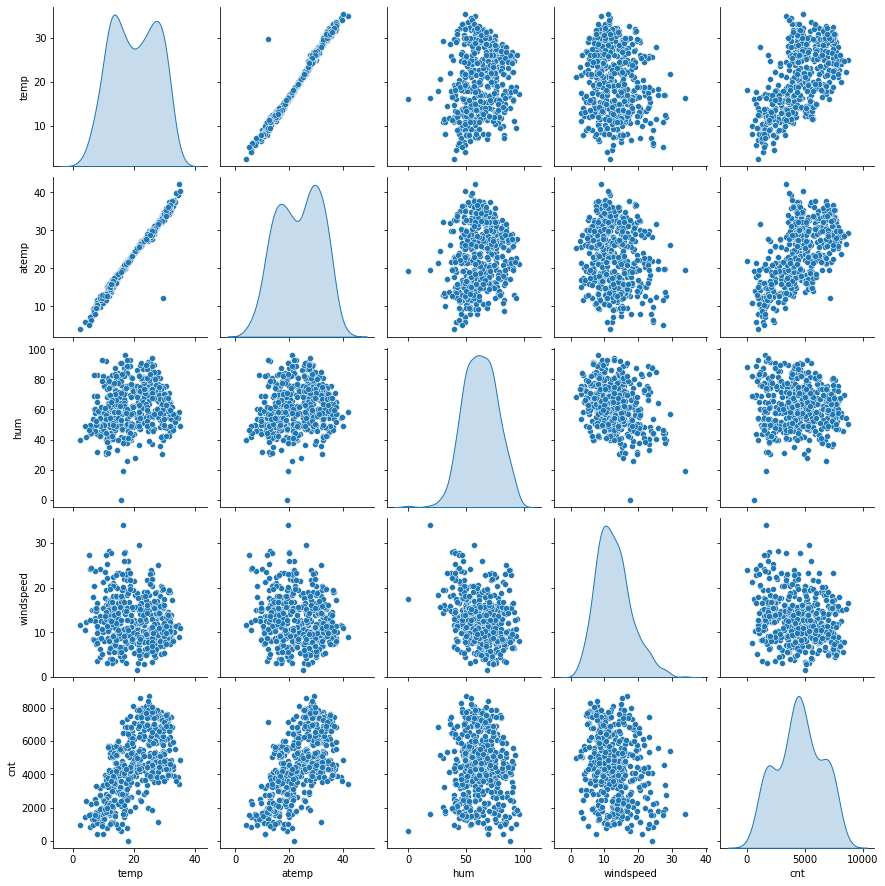

In [45]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

### Insights

* The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'


## Visualising Catagorical Variables

In [102]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   season_2      510 non-null    uint8  
 8   season_3      510 non-null    uint8  
 9   season_4      510 non-null    uint8  
 10  mnth_2        510 non-null    uint8  
 11  mnth_3        510 non-null    uint8  
 12  mnth_4        510 non-null    uint8  
 13  mnth_5        510 non-null    uint8  
 14  mnth_6        510 non-null    uint8  
 15  mnth_7        510 non-null    uint8  
 16  mnth_8        510 non-null    uint8  
 17  mnth_9        510 non-null    uint8  
 18  mnth_10       510 non-null  

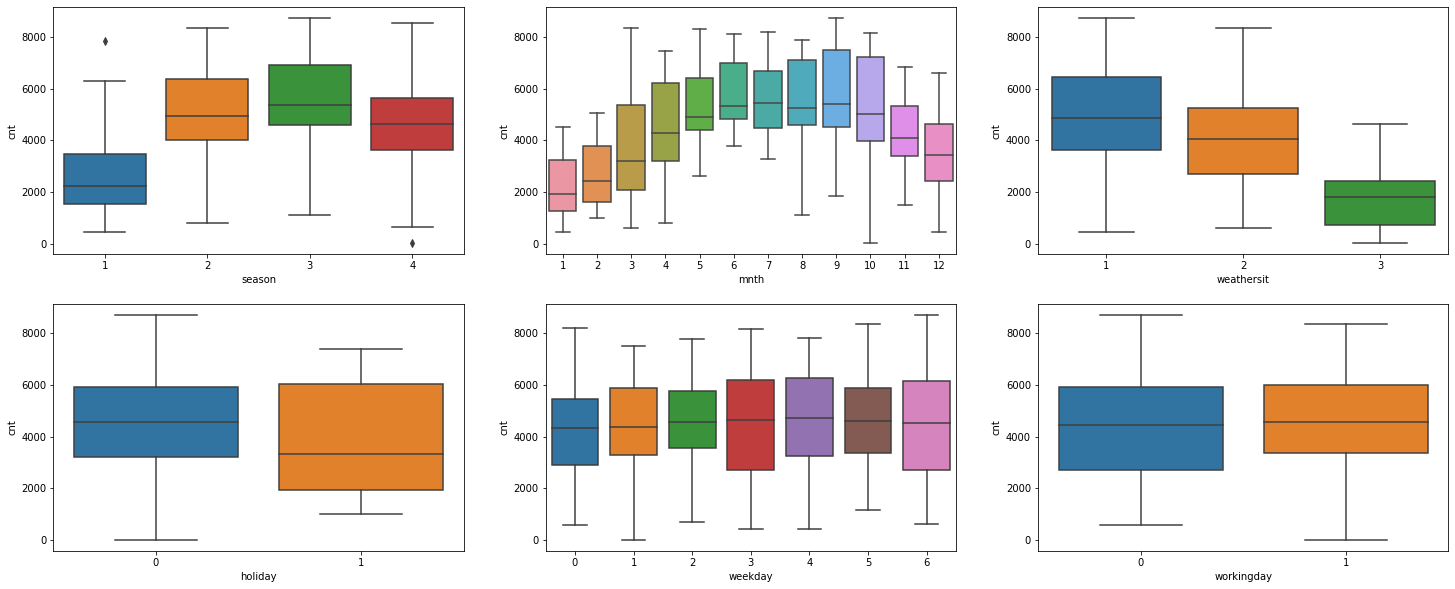

In [46]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_day_bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_day_bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_day_bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_day_bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_day_bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_day_bike)
plt.show()

### Insights

There were 6 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

The inference that We could derive were:

* season: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

* mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8,9 & 10 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

* weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

* holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

* weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

* workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

## Correlation Matrix

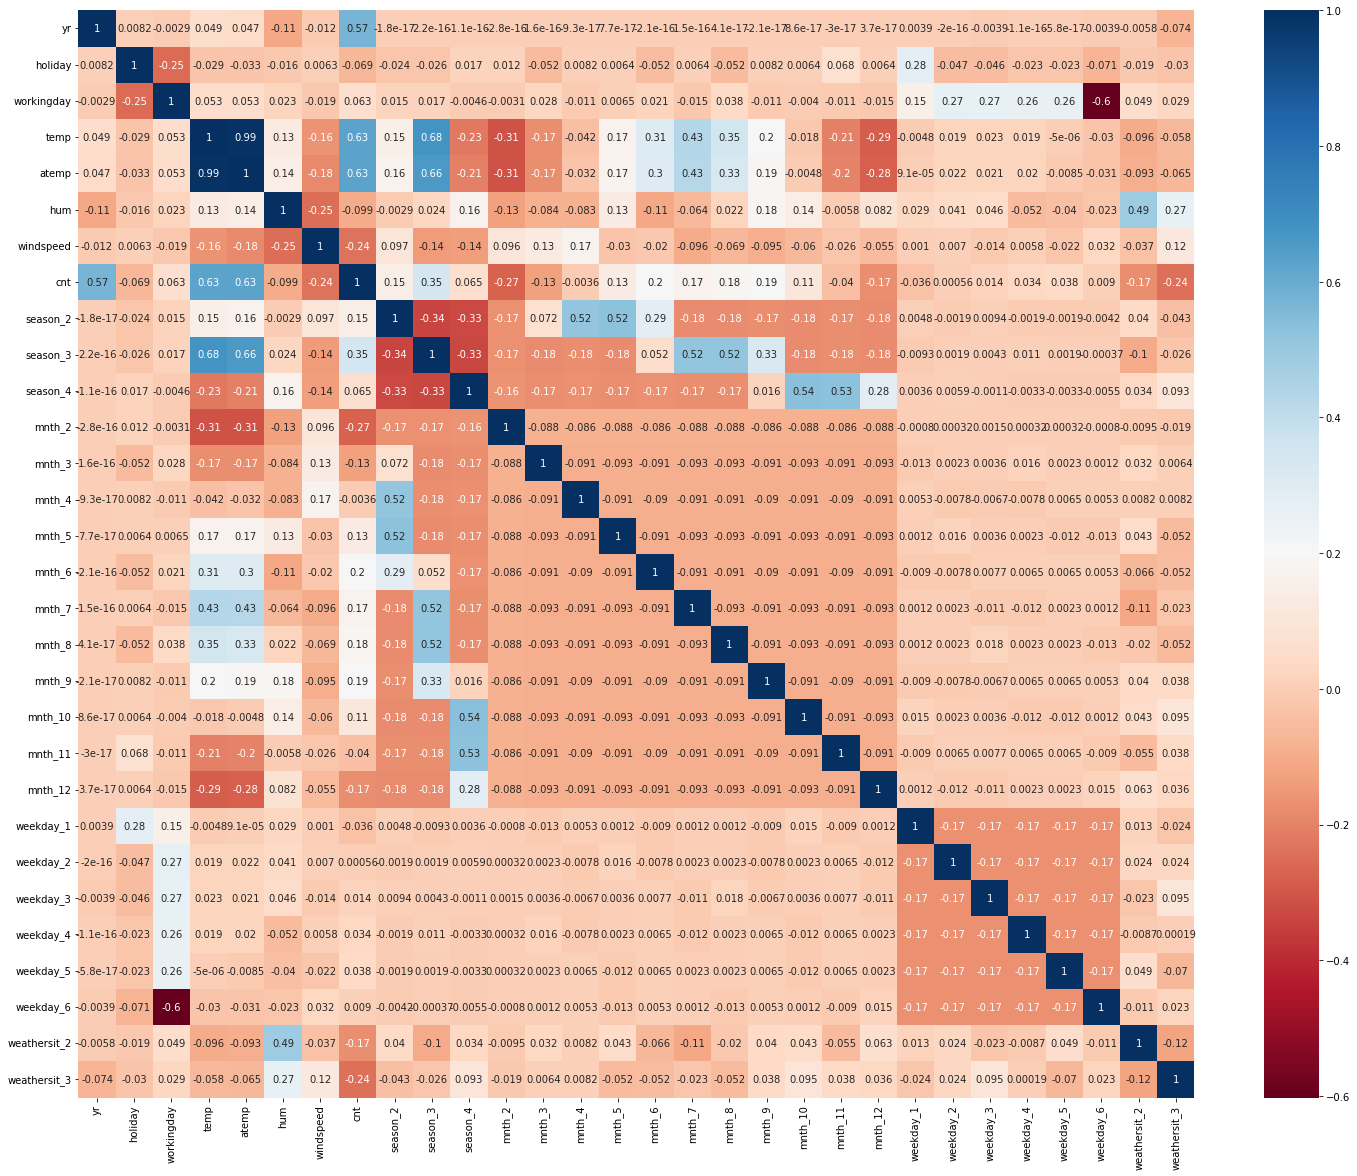

In [47]:
# Let's check the correlation coefficients to see which variables are highly correlated. 
# Note: here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

### Insights:

* The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.

* We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

## RESCALING THE FEATURES

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
print(df_train.columns,"___ print columns")

# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

print(df_train.shape, "_________shape____")
# Checking values after scaling

df_train.head()


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'], dtype='object') ___ print columns
(510, 30) _________shape____


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,0.241176,0.082353,0.078431,0.084314,0.092157,0.072549,0.078431,0.098039,0.082353,0.084314,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,0.428217,0.275172,0.269113,0.278131,0.289531,0.259649,0.269113,0.297660,0.275172,0.278131,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# BUILDING A LINEAR MODEL


### Dividing into X and Y sets for the model building

In [51]:
y_train = df_train.pop('cnt')
X_train = df_train

### RFE

Recursive feature elimination: We will be using the **** LinearRegression function from SciKit Learn **** for its compatibility with RFE (which is a utility from sklearn)

In [103]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 15)            
rfe = rfe.fit(X_train, y_train)


In [104]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 2),
 ('mnth_8', False, 2),
 ('mnth_9', True, 1),
 ('mnth_10', False, 2),
 ('mnth_11', False, 2),
 ('mnth_12', False, 2),
 ('weekday_1', False, 2),
 ('weekday_2', False, 2),
 ('weekday_3', False, 2),
 ('weekday_4', False, 2),
 ('weekday_5', False, 2),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [54]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'mnth_3', 'mnth_5', 'mnth_9', 'weekday_6', 'weathersit_2', 'weathersit_3'], dtype='object')

In [55]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'], dtype='object')

In [56]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Building Linear Model using 'STATS MODEL'


### Model 1


### VIF Check

In [105]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,386.25
2,atemp,363.71
3,hum,15.74
6,season_3,7.22
4,windspeed,4.61
5,season_2,3.73
7,season_4,2.69
12,weathersit_2,2.13
0,yr,2.00
9,mnth_5,1.76


In [58]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [59]:
# Check the parameters obtained

lr1.params

const           0.229413
yr              0.227019
temp            0.440299
atemp           0.067190
hum            -0.187809
windspeed      -0.189425
season_2        0.117728
season_3        0.075101
season_4        0.170128
mnth_3          0.051261
mnth_5          0.022260
mnth_9          0.094151
weekday_6       0.022682
weathersit_2   -0.042307
weathersit_3   -0.255193
dtype: float64

In [60]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          3.24e-183
Time:                        21:14:31   Log-Likelihood:                 498.42
No. Observations:                 510   AIC:                            -966.8
Df Residuals:                     495   BIC:                            -903.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2294      0.029      7.957   

### Model 2


* Removing the variable 'atemp' based on its High p-value & High VIF

In [61]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

### VIF Check

In [62]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,22.82
2,hum,15.40
5,season_3,7.12
3,windspeed,4.44
4,season_2,3.72
6,season_4,2.69
11,weathersit_2,2.12
0,yr,2.00
8,mnth_5,1.76
9,mnth_9,1.26


In [63]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [64]:
# Check the parameters obtained

lr2.params

const           0.230337
yr              0.226998
temp            0.503928
hum            -0.187051
windspeed      -0.192066
season_2        0.117935
season_3        0.073940
season_4        0.170408
mnth_3          0.051385
mnth_5          0.021940
mnth_9          0.094151
weekday_6       0.022795
weathersit_2   -0.042488
weathersit_3   -0.255638
dtype: float64

In [65]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.7
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          2.57e-184
Time:                        21:14:32   Log-Likelihood:                 498.30
No. Observations:                 510   AIC:                            -968.6
Df Residuals:                     496   BIC:                            -909.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2303      0.029      8.013   

### Model 3


* Removing the variable 'hum' based on its Very High 'VIF' value.

* Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [66]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

### VIF Check

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,15.53
4,season_3,6.87
2,windspeed,3.90
3,season_2,3.69
5,season_4,2.57
0,yr,2.00
7,mnth_5,1.75
10,weathersit_2,1.50
8,mnth_9,1.24
6,mnth_3,1.22


In [68]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [69]:
lr3.params

const           0.121472
yr              0.231659
temp            0.474117
windspeed      -0.153641
season_2        0.122413
season_3        0.080857
season_4        0.165019
mnth_3          0.058157
mnth_5          0.010077
mnth_9          0.085264
weekday_6       0.022138
weathersit_2   -0.073441
weathersit_3   -0.311445
dtype: float64

In [70]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     197.8
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          1.85e-180
Time:                        21:14:32   Log-Likelihood:                 486.37
No. Observations:                 510   AIC:                            -946.7
Df Residuals:                     497   BIC:                            -891.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1215      0.018      6.567   

### Model 4


* Removing the variable 'season3' based on its Very High 'VIF' value.

* Even though the VIF of season3 is second highest, we decided to drop 'season3' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [71]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

### VIF Check

In [72]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.96
2,windspeed,3.71
3,season_2,2.16
0,yr,1.99
6,mnth_5,1.67
9,weathersit_2,1.50
4,season_4,1.38
7,mnth_9,1.20
8,weekday_6,1.17
5,mnth_3,1.15


In [73]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [74]:
# Check the parameters obtained

lr4.params

const           0.108473
yr              0.230342
temp            0.576310
windspeed      -0.159242
season_2        0.083644
season_4        0.133061
mnth_3          0.046079
mnth_5         -0.004284
mnth_9          0.096909
weekday_6       0.023472
weathersit_2   -0.073907
weathersit_3   -0.306602
dtype: float64

In [75]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.1
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          1.09e-178
Time:                        21:14:32   Log-Likelihood:                 479.40
No. Observations:                 510   AIC:                            -934.8
Df Residuals:                     498   BIC:                            -884.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1085      0.018      5.897   

### Model 5


* Removing the variable 'mnth_5' based on its Very High p-value.

In [76]:
X_train_new = X_train_new.drop(["mnth_5"], axis = 1)

### VIF Check

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.89
2,windspeed,3.66
0,yr,1.99
3,season_2,1.56
8,weathersit_2,1.49
4,season_4,1.38
6,mnth_9,1.20
7,weekday_6,1.17
5,mnth_3,1.13
9,weathersit_3,1.07


In [78]:
 #Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [79]:
# Check the parameters obtained

lr5.params

const           0.108410
yr              0.230329
temp            0.575903
windspeed      -0.158587
season_2        0.082070
season_4        0.133102
mnth_3          0.046562
mnth_9          0.097057
weekday_6       0.023498
weathersit_2   -0.073945
weathersit_3   -0.306377
dtype: float64

In [80]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     230.5
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          7.17e-180
Time:                        21:14:32   Log-Likelihood:                 479.37
No. Observations:                 510   AIC:                            -936.7
Df Residuals:                     499   BIC:                            -890.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1084      0.018      5.900   

### Model 6


* Removing the variable 'mnth_3' based on its High 'p-value'.

In [81]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

### VIF Check

In [82]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.86
2,windspeed,3.51
0,yr,1.98
3,season_2,1.56
7,weathersit_2,1.48
4,season_4,1.35
5,mnth_9,1.20
6,weekday_6,1.17
8,weathersit_3,1.07


In [83]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [84]:
# Check the parameters obtained

lr6.params

const           0.119516
yr              0.231012
temp            0.563445
windspeed      -0.157640
season_2        0.082218
season_4        0.126749
mnth_9          0.095308
weekday_6       0.022207
weathersit_2   -0.072966
weathersit_3   -0.301879
dtype: float64

In [111]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.7
Date:                Sun, 09 Oct 2022   Prob (F-statistic):          2.28e-179
Time:                        22:18:39   Log-Likelihood:                 475.32
No. Observations:                 510   AIC:                            -930.6
Df Residuals:                     500   BIC:                            -888.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1195      0.018      6.612   

### Insights

* This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Final Model Interpretation

### Hypothesis Testing:

Hypothesis testing states that:

* H0:B1=B2=...=Bn=0
* H1: at least one Bi!=0

### lr6 model coefficient values
* const           0.119516
* yr              0.231012
* temp            0.563445
* windspeed      -0.157640
* season_2        0.082218
* season_4        0.126749
* mnth_9          0.095308
* weekday_6       0.022207
* weathersit_2   -0.072966
* weathersit_3   -0.301879

### Insights

* From the lr6 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

### F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

* F-statistic: 251.7
* Prob (F-statistic): 2.28e-179

The F-Statistics value of 251 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### The equation of best fitted surface based on model lr6:

cnt = 0.119516 + (yr × 0.231012) + (temp × 0.563445) − (windspeed × 0.157640) + (season2 × 0.082218) + (season4 ×0.126749) + (mnth9 × 0.095308) + (weekday6 ×0.022207) − (weathersit2 × 0.072966) − (weathersit3 × 0.301879)

### Interpretation of Coefficients:

* temp: A coefficient value of ‘0.563445’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5636 units.

* weathersit_3: A coefficient value of ‘-0.301879’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.3018 units.

* yr: A coefficient value of ‘0.231012’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2310 units.

* season_4: A coefficient value of ‘0.126749’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.1267 units.

* windspeed: A coefficient value of ‘-0.157640’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1576 units.

* season_2: A coefficient value of ‘0.082218’ indicated that w.r.t season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.0822 units.

* mnth_9: A coefficient value of ‘0.095308’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.0953 units.

* weekday_6: A coefficient value of ‘0.022207’ indicated that w.r.t weekday_1, a unit increase in weekday_6 variable increases the bike hire numbers by 0.0222 units.

* weathersit_2: A coefficient value of ‘-0.072966’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.0729 units.

* const: The Constant value of ‘0.119516’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.1195 units.


# ASSUMPTIONS


### Error terms are normally distributed with mean zero (not X, Y)


* Residual Analysis Of Training Data

In [86]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

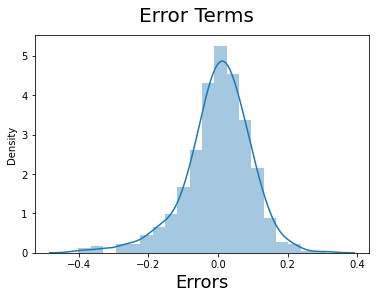

In [87]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Insights


* From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.


### There is a linear relationship between X and Y

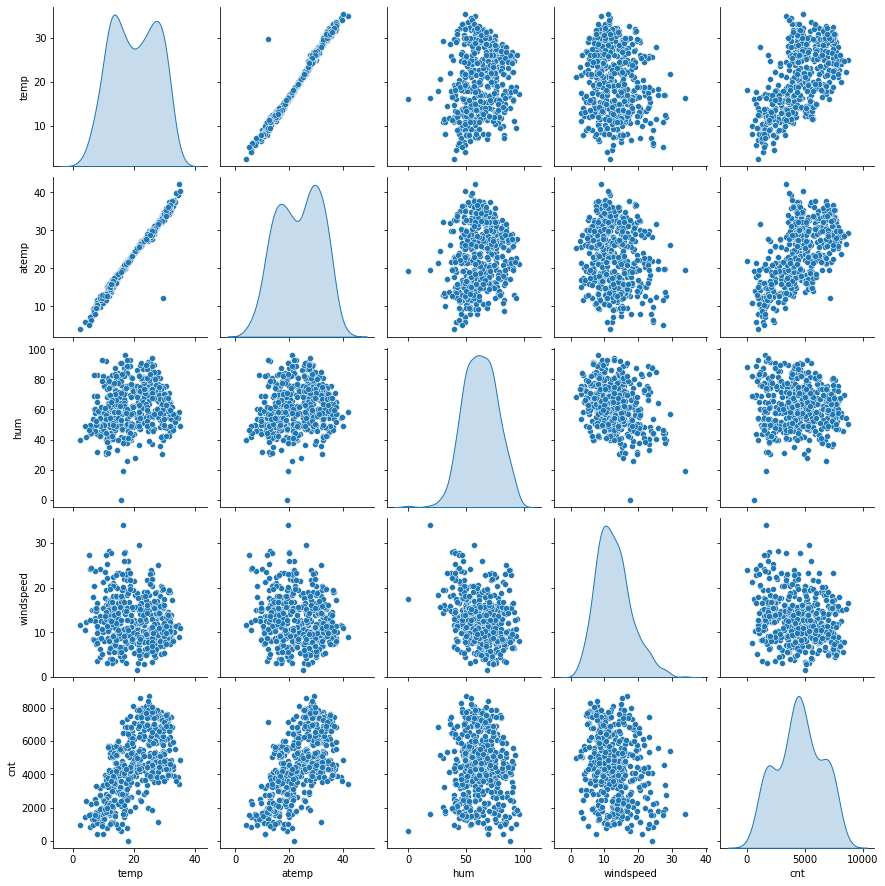

In [88]:
bike_new=bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

### Insight

* Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

### There is No Multicollinearity between the predictor variables

In [89]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.86
2,windspeed,3.51
0,yr,1.98
3,season_2,1.56
7,weathersit_2,1.48
4,season_4,1.35
5,mnth_9,1.20
6,weekday_6,1.17
8,weathersit_3,1.07


### Insight

* From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5


# MAKING PREDICTION USING FINAL MODEL¶

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

### Applying the scaling on the test sets

In [90]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [91]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [92]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,0.251142,0.059361,0.100457,0.077626,0.068493,0.105023,0.100457,0.054795,0.082192,0.086758,0.073059,0.105023,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.324201,0.036530
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,0.434663,0.236840,0.301297,0.268194,0.253169,0.307285,0.301297,0.228100,0.275286,0.282125,0.260830,0.307285,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [93]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [94]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_9        219 non-null    uint8  
 7   weekday_6     219 non-null    uint8  
 8   weathersit_2  219 non-null    uint8  
 9   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 9.8 KB


In [95]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

# MODEL EVALUATION

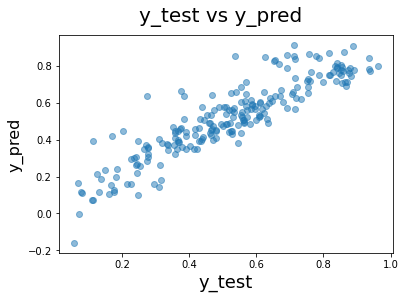

In [96]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

# R^2 Value for TEST

In [97]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8080916682491797

## Adjusted R^2 Value for TEST

In [98]:
# We already have the value of R^2 (calculated in above step)

r2=0.8080916682491797

In [99]:
# Get the shape of X_test
X_test.shape

(219, 9)

In [100]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7998276731020152

# Final Result Comparison

* Train R^2 :0.819
* Train Adjusted R^2 :0.816
* Test R^2 :0.808
* Test Adjusted R^2 :0.799
* This seems to be a really good model that can very well 'Generalize' various datasets


# FINAL REPORT


As per our final Model, the top 3 predictor variables that influences the bike booking are:

* Temperature (temp) - A coefficient value of ‘0.563445’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.563445 units.
* Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.301879’ indicated that, w.r.t Weathersit1, a unit increase in * Weathersit3 variable decreases the bike hire numbers by 0.301879 units.
* Year (yr) - A coefficient value of ‘0.231012’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.231012 units.

So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking
The next best features that can also be considered are

* season_4: - A coefficient value of ‘0.126749’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.126749 units.
* windspeed: - A coefficient value of ‘-0.157640’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.157640 units.

#### NOTE:

* The details of weathersit_1 & weathersit_3
* weathersit_1: Clear, Few clouds, Partly cloudy, Partly cloudy
* weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
### The details of season1 & season4

* season1: spring
* season4: winter